In [ ]:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

# feature importance

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# divide the data 
from sklearn.model_selection import KFold,cross_val_score

from sklearn.preprocessing import LabelEncoder

In [3]:
# DT lib

from sklearn.tree import DecisionTreeClassifier

# ensemble 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier



In [4]:
import warnings
warnings.filterwarnings('ignore')

## Preprocessing the Data

In [5]:
comp = pd.read_csv('Company_Data.csv')
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# converting ShelveLoc,Urban & US 

label_encode = LabelEncoder()

for i in comp.columns:
    if comp[i].dtype == object:
        
        comp[i] = label_encode.fit_transform(comp[i])
    else:
        pass

# comp['ShelveLoc'] = label_encode.fit_transform(comp['ShelveLoc'])
# comp['Urban'] = label_encode.fit_transform(comp['Urban'])
# comp['US'] = label_encode.fit_transform(comp['US'])

In [ ]:
# Sales is in continous in nature - converting it to categorical 

In [8]:
len(comp['Sales'].unique())

336

In [9]:
comp['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [10]:
n = []

for i in comp['Sales']:
    
    if i < 5.39:
        n.append('Low')
    elif i < 9.32:
        n.append('Moderate')
    else:
        n.append('Premium')

In [11]:
comp.insert(0,column='Sales_Category',value=n)

In [12]:
comp.head()

,Sales_Category,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Premium,9.50,138,73,11,276,120,0,42,17,1,1
1,Premium,11.22,111,48,16,260,83,1,65,10,1,1
2,Premium,10.06,113,35,10,269,80,2,59,12,1,1
3,Moderate,7.40,117,100,4,466,97,2,55,14,1,1
4,Low,4.15,141,64,3,340,128,0,38,13,1,0


In [13]:
comp.drop('Sales',axis=1,inplace=True)

In [14]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sales_Category  400 non-null    object
 1   CompPrice       400 non-null    int64 
 2   Income          400 non-null    int64 
 3   Advertising     400 non-null    int64 
 4   Population      400 non-null    int64 
 5   Price           400 non-null    int64 
 6   ShelveLoc       400 non-null    int32 
 7   Age             400 non-null    int64 
 8   Education       400 non-null    int64 
 9   Urban           400 non-null    int32 
 10  US              400 non-null    int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 29.8+ KB


In [15]:
comp[comp.duplicated()].shape

(0, 11)

In [16]:
comp['Sales_Category'].value_counts()

Moderate    198
Premium     102
Low         100
Name: Sales_Category, dtype: int64

<AxesSubplot:>

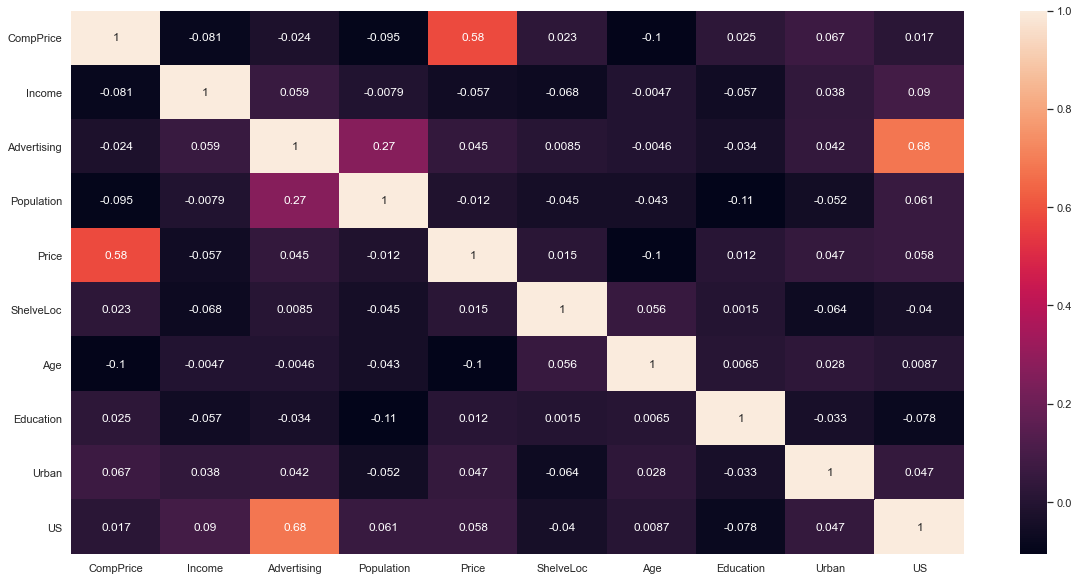

In [17]:
# All other variables are independent

plt.figure(figsize=(20,10))
sns.heatmap(comp.corr(),annot=True)

In [18]:
x = comp.iloc[:,1:]
y = comp.iloc[:,0]

In [19]:
# Splitting the Data
kfold = KFold(n_splits=10)

In [20]:
# creating Base Decision tree Model

d_tree = DecisionTreeClassifier()

## Random Forest 

In [21]:
# Model Structure
n_trees = 100

model_rf = RandomForestClassifier(n_estimators=n_trees,max_features=3 ,random_state=8)

In [22]:
# Accuracy of All the Models - 10 DT Model
result_rf = cross_val_score(model_rf,x,y,cv=kfold)
result_rf

array([0.625, 0.7  , 0.625, 0.65 , 0.7  , 0.675, 0.675, 0.625, 0.725,
       0.6  ])

In [23]:
# mean Accuracy of Model

print(f'mean Accuracy of Model is {np.round(result_rf.mean(),4)*100} %')

mean Accuracy of Model is 66.0 %


### Feature Selection - Segment or Attributes Causes High Sale. 

In [24]:
# fitting the model

model_rf.fit(x,y)

RandomForestClassifier(max_features=3, random_state=8)

In [25]:
imp_feature = model_rf.feature_importances_
imp_feature

array([0.1163715 , 0.10592343, 0.09198597, 0.11417605, 0.21788569,
       0.12658882, 0.12200886, 0.06877507, 0.01596002, 0.02032459])

In [26]:
name_feature = model_rf.feature_names_in_

Text(0.5, 1.0, 'Feature Selection By RF')

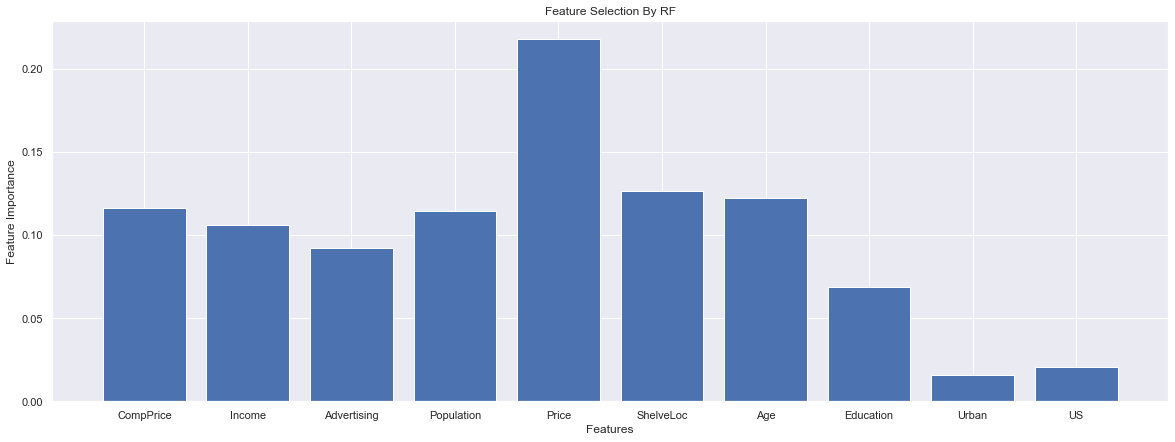

In [27]:
plt.figure(figsize=(20,7))
plt.bar(name_feature,imp_feature)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Selection By RF')

## Bagging

In [28]:
# Model Structure
n_trees = 100
model_bag = BaggingClassifier(base_estimator=d_tree,n_estimators=n_trees,random_state=8)

In [29]:
# Accuracy of All the Models - 10 DT Model
result_bag = cross_val_score(model_bag,x,y,cv=kfold)
result_bag

array([0.625, 0.75 , 0.575, 0.65 , 0.7  , 0.7  , 0.725, 0.65 , 0.75 ,
       0.625])

In [30]:
# mean Accuracy of Model

print(f'mean Accuracy of Model is {np.round(result_bag.mean(),4)*100} %')

mean Accuracy of Model is 67.5 %


## Stacking

In [31]:
estimators = []

estimators.append(('Decision Tree',d_tree))

estimators.append(('Random Forest',model_rf))

estimators.append(('Bagging',model_bag))

In [32]:
# create the ensemble model
ensembel = VotingClassifier(estimators= estimators)

In [33]:
# finding the accuracy

result_voting = cross_val_score(ensembel,x,y,cv=kfold)

In [34]:
print(f'mean Accuracy of Model is {np.round(result_voting.mean(),4)*100} %')

mean Accuracy of Model is 68.25 %
